# Example: constructing a protocol for Eigenvalue Filtering

Given access to a unitary $U$ and an eigenstate $U \ket{\psi} = e^{i\varphi} \ket{\psi}$ for $\varphi \in [-\pi, \pi)$, decide whether $\varphi \ge \Delta$ or $\varphi \le -\Delta$. In other words, check in which half of the unit circle $\varphi$ is located.

We can use a QSP/QET-U (see [arXiv:2204.05955](https://arxiv.org/abs/2204.05955)): this consists in applying a QSP protocol to controlled versions of $U, U^\dag$.
$$\ket{0} \otimes \ket{\psi} \mapsto \ket{0} \otimes P(U) \ket{\psi} + \ket{1} \otimes Q(U) \ket{\psi} = (P(e^{i\varphi}) \ket{0} + Q(e^{i\varphi}) \ket{1}) \otimes \ket{\psi}$$

If we accurately design $P$, the first qubit will carry out the information we are looking for.

In [1]:
import scipy as sp

from nlft_qsp.approximate import fourier_approximate
from nlft_qsp.poly import Polynomial
from nlft_qsp.qsp import gqsp_solve
from nlft_qsp.plot import plot_fourier

NumpyBackend -- chosen dtypes: complex128, float64


We define the function
$$f_{\delta, \kappa}(e^{i\varphi}) = \frac{1 - \delta + (1 - \delta) \text{erf}(\kappa \sin \varphi)}{2}$$
which is a smoothed square wave, being $\ge 1 - \delta$ if $\varphi > \Delta$ and $\simeq 0$ if $\varphi < \Delta$.

Here $\delta$ is the measurement error we allow for the filtering. $\kappa$ must be chosen sufficiently large so that $f(\Delta) \ge 1 - \delta$.

We also compute the Laurent expansion $P(z)$ which will be implemented by QSP.

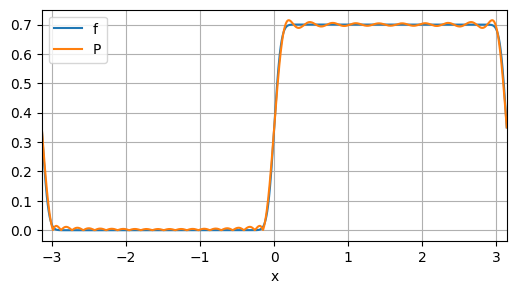

In [2]:
K = 10
delta = 0.3

def f(z):
    return (1 - delta + (1 - delta) * sp.special.erf(K*(z - 1/z)/2j))/2

P = fourier_approximate(f, 20)

plot_fourier({
    "f": f,
    "P": P
})

We only care about $|P|^2$, so we shift $P \mapsto z^n P$ and implement this polynomial with analytic QSP.

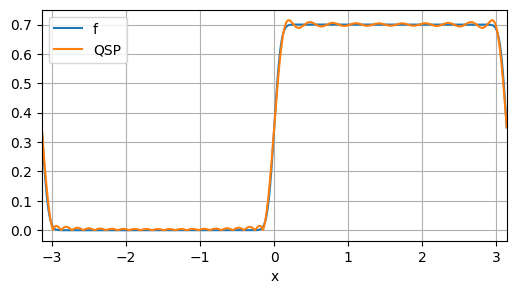

In [3]:
P = Polynomial(P.coeffs, 0) # We only care about |P|^2

pf = gqsp_solve(P)
P2, _ = pf.polynomials()

plot_fourier({
    "f": f,
    "QSP": P2
})